# Determine the scaling factor to map the theory onto the simulation

This notebook calculates the volume scaling required to map the theoretical profiles onto the computed density profiles such that the integral of both profiles is identical.

\begin{equation}
\int_0^\infty \rho_\text{th} \text{d}z = \int_0^\infty \rho_\text{sim} \text{d}z\tag{1}
\end{equation}

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Import custom package
import brush as b
from config import FIGURE_SIZE, FIGURE_SIZE_LARGE, FIGURE_DPI, nature_colors

## Load the profiles

In [54]:
# Load the profiles
osmotic_prefactor = 1.0
brush_10 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D100.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_11 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D110.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_12 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D120.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_14 = b.Brush("simulation",
                   {"filename": "../data/Density_profile_D140.csv"},
                   osmotic_prefactor=osmotic_prefactor)


In [55]:
def calculate_errors(volume_scaling):
    # Theoretical profiles
    brush_10_th = b.Brush("model",
                        {"type" : "gaussian",
                        "Mn" : 100,
                        "sigma" : 0.1},
                        volume_scaling = volume_scaling)
    brush_11_th = b.Brush("model",
                        {"type": "schulz-zimm",
                        "Mn" : 100,
                        "D" : 1.1},
                        volume_scaling = volume_scaling)
    brush_12_th = b.Brush("model",
                        {"type": "schulz-zimm",
                        "Mn" : 100,
                        "D" : 1.2},
                        volume_scaling = volume_scaling)
    brush_14_th = b.Brush("model",
                        {"type": "schulz-zimm",
                        "Mn" : 100,
                        "D" : 1.4},
                        volume_scaling = volume_scaling)
    errors = np.array([np.trapz(brush_10.phi_N,brush_10.z) - np.trapz(brush_10_th.phi_N,brush_10_th.z),
              np.trapz(brush_11.phi_N,brush_11.z) - np.trapz(brush_11_th.phi_N,brush_11_th.z),
              np.trapz(brush_12.phi_N,brush_12.z) - np.trapz(brush_12_th.phi_N,brush_12_th.z),
              np.trapz(brush_14.phi_N,brush_14.z) - np.trapz(brush_14_th.phi_N,brush_14_th.z)])
    return errors

1.6616161616161615


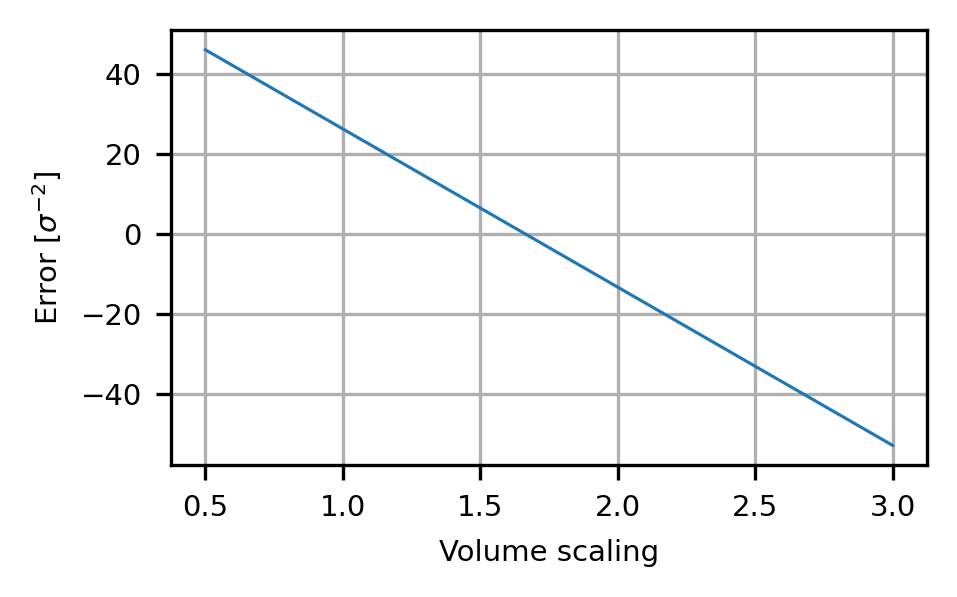

In [60]:
volume_scalings= np.linspace(0.5,3,num=100)
errors = np.zeros((len(volume_scalings),4))
for i, volume_scaling in enumerate(volume_scalings):
    errors[i,:] = calculate_errors(volume_scaling)

print(volume_scalings[np.argmin(np.abs(np.sum(errors,axis=1)))])
fig, ax = plt.subplots(figsize=FIGURE_SIZE,dpi=FIGURE_DPI)
ax.plot(volume_scalings,np.sum(errors,axis=1))
ax.set_xlabel('Volume scaling')
ax.set_ylabel('Error [$\sigma^{-2}$]')
ax.grid()

fig.tight_layout()